In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report  

In [48]:
data = pd.read_csv('Titanic.csv')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [49]:
data = data.drop(['name', 'ticket', 'fare'], axis=1)

data.head()

,pclass,survived,sex,age,sibsp,parch,cabin,embarked,boat,body,home.dest
0,1,1,female,29.00,0,0,B5,S,2,NaN,"St Louis, MO"
1,1,1,male,0.92,1,2,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.00,1,2,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.00,1,2,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.00,1,2,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [50]:
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['embarked'] = le.fit_transform(data['embarked'].astype(str))
data['home.dest'] = le.fit_transform(data['home.dest'].astype(str))
data['body'] = le.fit_transform(data['body'].astype(str))
data['boat'] = le.fit_transform(data['boat'].astype(str))
data['cabin'] = le.fit_transform(data['cabin'].astype(str))

data.head()

,pclass,survived,sex,age,sibsp,parch,cabin,embarked,boat,body,home.dest
0,1,1,0,29.00,0,0,43,2,11,121,308
1,1,1,1,0.92,1,2,79,2,2,121,230
2,1,0,0,2.00,1,2,79,2,27,121,230
3,1,0,1,30.00,1,2,79,2,27,15,230
4,1,0,0,25.00,1,2,79,2,27,121,230


In [51]:
X = data.drop('survived', axis=1)
y = data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

In [53]:
model.fit(X_train, y_train)

c:\Users\syeds\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:06:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [54]:
y_pred = model.predict(X_test)

In [55]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.95%


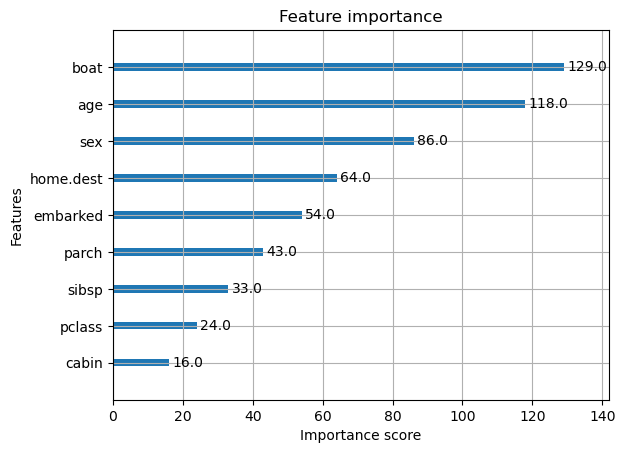

In [56]:
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.show()